In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In this assignment, we study the behavior of the logistic map x |-> r * x * (1 - x).

 

Step-by-step guide:

- implement the map, plot the evolution of x
- play around with values of r, see the change of evolution
- then create a linspace of r’s, for every r save last “m” values of x after first
“n” values (can be m=200, x=200), play around with values
- Get the bifurcation map
-Visualize the evolution (play around)

1. Implement the map, plot the evolution of x (1 point)
2. Create a linspace of r’s, for every r save the last “m” values of x 
after the first “n” values (can be m=200, x=200), play around with
values (1 point)
3. Plot the bifurcation map (1 point)

In [2]:
def get_next_step(r, x):
    return r * x * (1. - x)

In [3]:
NUM_OF_STEPS = 100000
INITIAL_STATE = 0.1
M = 1000
N = 10000

r_list = linspace(1, 10, M)

data = empty((M, M))

In [4]:
for index, r in enumerate(r_list):
    x = [INITIAL_STATE]
    for _ in range(NUM_OF_STEPS):
        x.append(get_next_step(r, x[-1]))
    
    data[index] = x[index + N: index + N + M]
len(x)

<ipython-input-2-2c92e758725c>:2: RuntimeWarning: overflow encountered in double_scalars
  return r * x * (1. - x)


100001

In [29]:
%matplotlib inline

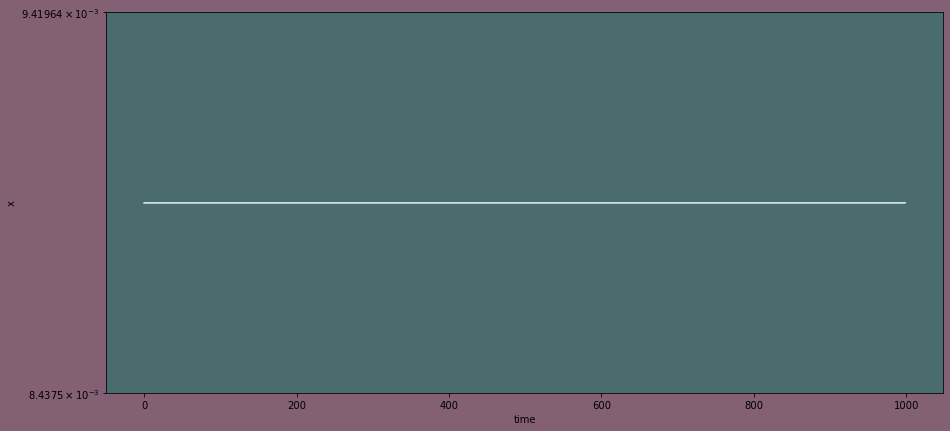

In [30]:
fig, ax = subplots(figsize=(15, 7))

xlabel('time')
ylabel('x')

yscale('symlog')
# xscale('log')

fig.set_facecolor('#846075')
ax.set_facecolor('#4A6C6F')
    
ax.plot(arange(0, M, 1), data[1], '-,', color='#D7DEDC')
    
# axis('off')
pyplot.show()

In [31]:
amin(data), amax(data)

(-inf, 0.9999980599303567)

In [32]:
from IPython.display import HTML, Image

rcParams['animation.embed_limit'] = 200

In [1]:
fig, ax = subplots(figsize=(15, 15))

fig.set_facecolor('#846075')

ax.axis([min(r_list), 5, 0, amax(data) + 0.1])
ax.set_facecolor('#4A6C6F')

xlabel('r')
ylabel('population equlibrium')
l, = ax.plot([], [], '.', color='#D7DEDC')

t = [r * ones(data.shape[0]) for r in r_list]
x = data

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t), interval=20)

HTML(ani.to_jshtml())

NameError: name 'subplots' is not defined

In [ ]:
# !brew install imagemagick

In [ ]:
ani.save('bif_map.gif', writer='imagemagick', fps=60)

In [ ]:
Image(url='bif_map.gif')